# Lab 5 
### Kovaleva Maria

##Task

Consider the following bi-level optimization problem:

  1) $L_\text{train} = |h + w|^2$

  2) $L_\text{val} = |w|^2$ 

Run n-order hyperparameter optimization for such a problem ($n=0..5$). 

Visualize optimization trajectories in two surface plots: $(h, w, L_\text{train})$, $(h, w, L_\text{val})$

## Solution

### Common optimization scheme

0) $C_1(w|h) = L_{\text{train}} = |h + w|^2$

   $C_2(w|h) = L_{\text{val}} = |w|^2$


1)  $\nabla_{w}C_1(w_t|h_t) = 2 (h + w)$;

$w_{t+1} = w_t + η_1\nabla_{w}C_1(w_t|h_t)$



2)  $\nabla_hC_2 = (\nabla_w C_2)(\nabla_h w_{t+1}) $


$h_{t+1} = h_t + η_2\nabla_hC_2 = h_t + η_2(\nabla_w C_2)(\nabla_h w_{t+1})$


We need to find $\nabla_h w_{t+1}$, for that we need to find $w_{t+1}$ in dependence of $h$


### From 1 to 5 optimization steps for $w$ :


1) $w_{t+1} = w_t + η_1\nabla_{w}C_1(w_t|h_t) =  w_t + 2η_1(h_t + w_t) = w_t(1+2η_1) + 2η_1 h_t$

In total: $w_{t+1} = w_t(1+2η_1) + 2η_1 h_t$


2) $w_{t+2} = w_{t+1} + η_1\nabla_{w}C_1(w_{t+1}|h_t) = w_t + 2η_1(h_t + w_t) + 2η_1(h_t + w_{t+1}) = w_t + 2η_1(h_t + w_t) + 2η_1(h_t + w_t + 2η_1(h_t + w_t)) = w_t(1+ 4η_1 + 4η_1^2) + h_t(4η_1 + 4η_1^2)$

In total: $w_{t+2} = w_t(1+ 4η_1 + 4η_1^2) + h_t(4η_1 + 4η_1^2)$


3) $w_{t+3} = w_{t+2} + η_1\nabla_{w}C_1(w_{t+2}|h_t) = w_t(1+ 4η_1 + 4η_1^2) + h_t(4η_1 + 4η_1^2) + 2η_1(h_t + w_{t+2}) = w_t(1+ 4η_1 + 4η_1^2) + h_t(4η_1 + 4η_1^2) + 2η_1(h_t + w_t(1+ 4η_1 + 4η_1^2) + h_t(4η_1 + 4η_1^2)) = w_t(1+2η_1)^3 + h_t(4η_1+4η_1^2+2η_1+8η_1^2+8η_1^3) = w_t(1+2η_1)^3 + h_t(6η_1+12η_1^2+8η_1^3)$

In total: $w_{t+3} = w_t(1+2η_1)^3 + h_t(6η_1+12η_1^2+8η_1^3)$


4) $w_{t+4} = w_{t+3} + η_1\nabla_{w}C_1(w_{t+3}|h_t) = w_t(1+2η_1)^3 + h_t(6η_1+12η_1^2+8η_1^3) + 2η_1(w_{t+3}+h_t) = w_t(1+2η_1)^3 + h_t(6η_1+12η_1^2+8η_1^3) + 2η_1 (w_t(1+2η_1)^3 + h_t(6η_1+12η_1^2+8η_1^3) + h_t) = w_t(1+2η_1)^4 + h_t(6η_1+12η_1^2+8η_1^3 + 2η_1(6η_1+12η_1^2+8η_1^3) + 2η_1) = w_t(1+2η_1)^4 + h_t(8η_1+24η_1^2+32η_1^3 + 16η_1^4)$

In total: $w_{t+4} = w_t(1+2η_1)^4 + h_t(8η_1+24η_1^2+32η_1^3 + 16η_1^4)$

5) $w_{t+5} = w_{t+4} + η_1\nabla_{w}C_1(w_{t+4}|h_t) = w_{t+4} + 2η_1(w_{t+4} + h_t) = w_{t+4}(1+2η_1) + 2η_1h_t =(1+2η_1)( w_t(1+2η_1)^4 + h_t(8η_1+24η_1^2+32η_1^3 + 16η_1^4)) + 2η_1h_t = w_t(1+2η_1)^5 + h_t((8η_1+24η_1^2+32η_1^3 + 16η_1^4)(1+2η_1) + 2η_1) = w_t(1+2η_1)^5 + h_t(10η_1+40η_1^2+80η_1^3 + 80η_1^4 +32η_1^5) $

In total: $w_{t+5} = w_t(1+2η_1)^5 + h_t(10η_1+40η_1^2+80η_1^3 + 80η_1^4 +32η_1^5)$



### Optimization of different orders

- 0) $w_{t+1} = w_{t}$

  $h_{t+1} = h_{t} + η_2 (2 w)(0) = h_t$

  (нет оптимизации, $w$ и $h$ просто остаются на месте)

- 1) $w_{t+1} = w_t(1+2η_1) + 2η_1 h_t$

  $h_{t+1} = h_{t} + η_2 (2 w_t) (2η_1) = h_{t} + 4 η_1 η_2 w_t$

- 2) $w_{t+1} = w_t(1+ 4η_1 + 4η_1^2) + h_t(4η_1 + 4η_1^2)$

  $h_{t+1} = h_{t} + η_2 (2 w_t) (4η_1 + 4η_1^2) = h_{t} + 8 η_1 η_2(1+η_1) w_t$

- 3) $w_{t+1} = w_t(1+2η_1)^3 + h_t(6η_1+12η_1^2+8η_1^3)$

  $h_{t+1} = h_{t} + η_2 (2 w_t) (6η_1+12η_1^2+8η_1^3) = h_{t} + 4 η_1 η_2(3+6η_1+4η_1^2) w_t$

- 4) $w_{t+1} = w_t(1+2η_1)^4 + h_t(8η_1+24η_1^2+32η_1^3 + 16η_1^4)$ 

  $h_{t+1} = h_{t} + η_2 (2 w_t) (8η_1+24η_1^2+32η_1^3 + 16η_1^4) = h_{t} + 16 η_1 η_2(1+3η_1+4η_1^2 + 2η_1^3) w_t$

- 5) $w_{t+1} = w_t(1+2η_1)^5 + h_t(10η_1+40η_1^2+80η_1^3 + 80η_1^4 +32η_1^5)$

  $h_{t+1} = h_{t} + η_2 (2 w_t) (10η_1+40η_1^2+80η_1^3 + 80η_1^4 +32η_1^5) = h_{t} + 4 η_1 η_2(5+20η_1+40η_1^2 + 40η_1^3 + 16η_1^4) w_t$

- Common: $w_{t+1} = w_t \cdot \text{polynom}_1 + h_t \cdot \text{polynom}_2$

  $h_{t+1} = h_{t} + 2 η_2 w_t \cdot \text{polynom}_2$

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def polynoms(lr1, order = 1):
  """return polynom1, polynom2 for different orders"""
  if order == 0:
    return 1, 0, 0
  elif order == 1:
    return 1 + 2 * lr1, 2 * lr1
  elif order == 2:
    return (1 + 2 * lr1)**2, 4 * lr1 * (1 + lr1)
  elif order == 3:
    return (1 + 2 * lr1)**3, 6 * lr1 + 12 * lr1**2 + 8 * lr1**3
  elif order == 4:
    return (1 + 2 * lr1)**4, 8 * lr1 + 24 * lr1**2 + 32 * lr1**3 + 16 * lr1**4
  elif order == 5:
    return (1 + 2 * lr1)**5, 10 * lr1 + 40 * lr1**2 + 80 * lr1**3 + 80 * lr1**4 + 32 * lr1**5
  else:
    return None, None

def next_step(w_t, h_t, lr1, lr2, order = 1):
  polynom1, polynom2 = polynoms(lr1, order)
  w = w_t * polynom1 + h_t * polynom2
  h = h_t + 2 * lr2 * w_t * polynom2
  return w, h

def step_vector(w_t, h_t, lr1, lr2, order = 1, norm = None):
  w, h = next_step(w_t, h_t, lr1, lr2, order = 1)
  n = np.sqrt((w - w_t)**2 + (h - h_t)**2)
  if norm == None:
    return [w_t, w], [h_t, h]
  else:
    w_new = w_t + (w - w_t) / n * norm 
    h_new = h_t + (h - h_t) / n * norm 
    return [w_t, w_new], [h_t, h_new]

<ipython-input-6-9b1608e67dcf>:30: RuntimeWarning: invalid value encountered in double_scalars
  w_new = w_t + (w - w_t) / n * norm
<ipython-input-6-9b1608e67dcf>:31: RuntimeWarning: invalid value encountered in double_scalars
  h_new = h_t + (h - h_t) / n * norm


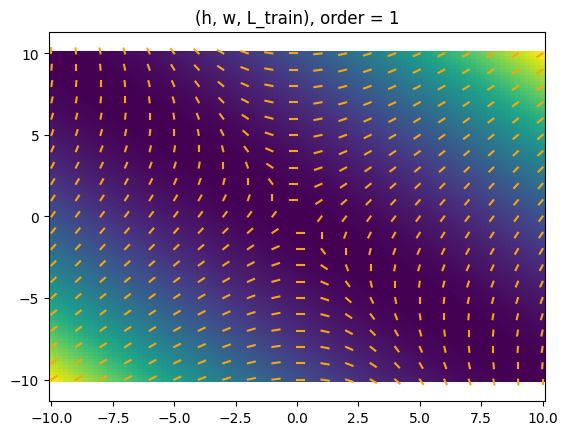

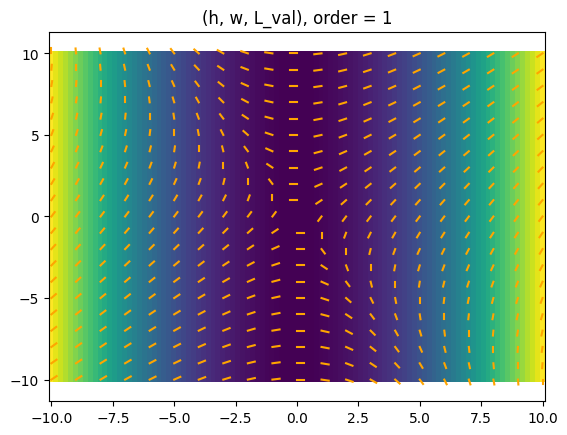

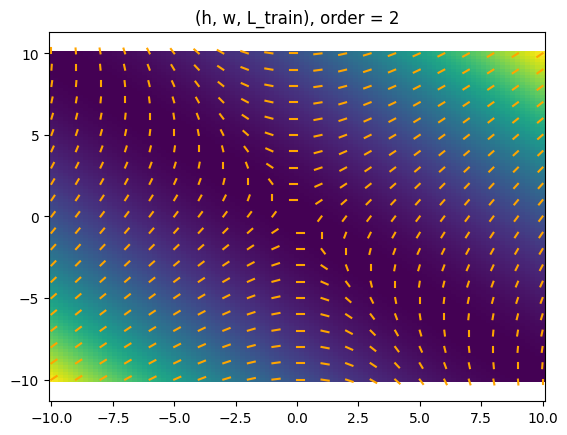

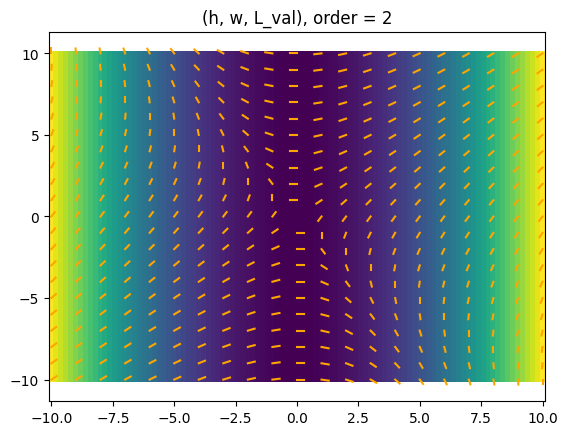

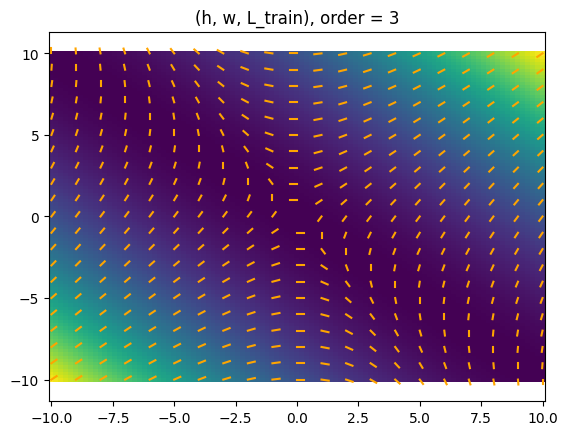

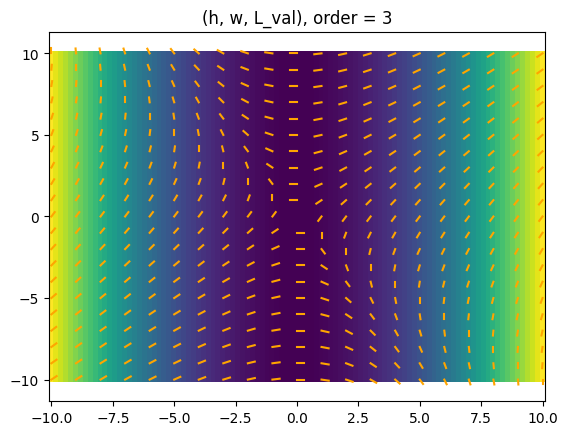

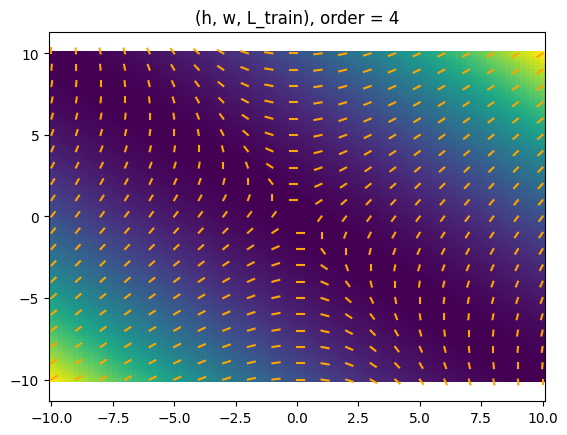

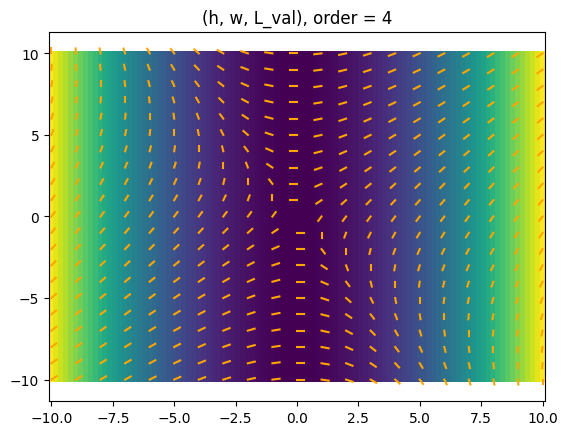

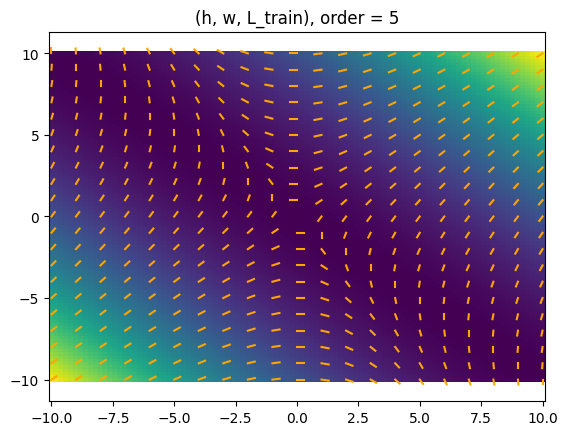

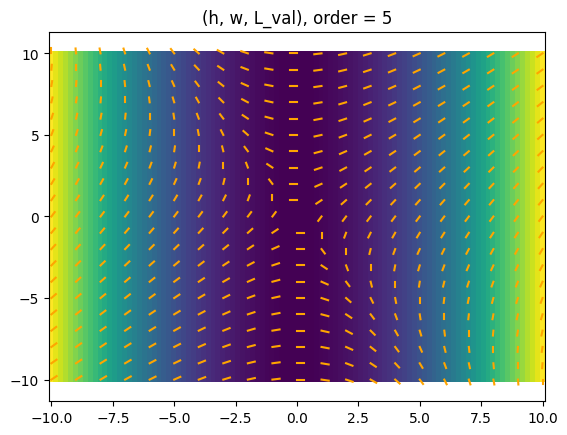

In [7]:
lr1 = 1
lr2 = 1
norm = 0.3

hs = np.linspace(-10, 10, 101)
ws = np.linspace(-10, 10, 101)
X, Y = np.meshgrid(hs, ws)

for order in [1, 2, 3, 4, 5]:
  z1 = np.array([(h+w)**2 for h in hs for w in ws])
  Z1 = z1.reshape(101, 101)
  plt.pcolor(X, Y, Z1)
  for w0 in range(-10, 11):
    for h0 in range(-10, 11):
      xs, ys = step_vector(w0, h0, lr1, lr2, order = order, norm = norm)
      plt.plot(xs, ys, color = "orange")
  plt.title(f"(h, w, L_train), order = {order}")
  plt.show()

  z2 = np.array([(w)**2 for h in hs for w in ws])
  Z2 = z2.reshape(101, 101)
  plt.pcolor(X, Y, Z2)
  for w0 in range(-10, 11):
    for h0 in range(-10, 11):
      xs, ys = step_vector(w0, h0, lr1, lr2, order = order, norm = norm)
      plt.plot(xs, ys, color = "orange")
  plt.title(f"(h, w, L_val), order = {order}")
  plt.show()

## Conclusion

I don't see sufficient differences in optimization trajectories for different orders. Actually all the orders seemed to be equal for hyperparameter optimization as $h_{t+1} = h_{t} + 2 η_2 w_t \cdot \text{polynom}_2$, where $\text{polynom}_2$ is some polynom from $η_1$, which can be eliminated by $η_2$